In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile

movies_file_path = "C:/Users/rashmitha/Downloads/movies.csv"
ratings_file_path = "C:/Users/rashmitha/Downloads/ratings.csv"
zip_file = "C:/Users/rashmitha/Downloads/movie_data.zip"
extract_path = "C:/Users/rashmitha/Downloads/"

movies_data = pd.read_csv(movies_file_path)
ratings_data = pd.read_csv(ratings_file_path)

In [2]:
print("Movies Data Shape:", movies_data.shape)
print("Ratings Data Shape:", ratings_data.shape)

Movies Data Shape: (9742, 3)
Ratings Data Shape: (100836, 4)


In [3]:
with ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

ratings = pd.read_csv(extract_path + "ratings.csv")

In [4]:
unique_user_ids = ratings['userId'].nunique()
print(unique_user_ids)

610


In [5]:
max_ratings_movie_id = ratings['movieId'].value_counts().idxmax()
movies = pd.read_csv(extract_path + "movies.csv")
max_ratings_movie_title = movies.loc[movies['movieId'] == max_ratings_movie_id, 'title'].values[0]
print(max_ratings_movie_title)

Forrest Gump (1994)


In [6]:
tags = pd.read_csv(extract_path + "tags.csv")
movies = pd.read_csv(extract_path + "movies.csv")

matrix_movie_id = movies.loc[movies['title'] == "Matrix, The (1999)", 'movieId'].values[0]
matrix_tags = tags.loc[tags['movieId'] == matrix_movie_id, 'tag'].values
print("Tags for Matrix, The (1999):", matrix_tags)

Tags for Matrix, The (1999): ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [7]:
terminator_movie_id = movies.loc[movies['title'] == "Terminator 2: Judgment Day (1991)", 'movieId'].values[0]
terminator_ratings = ratings.loc[ratings['movieId'] == terminator_movie_id, 'rating']
average_rating = np.mean(terminator_ratings)
print(average_rating)

3.970982142857143


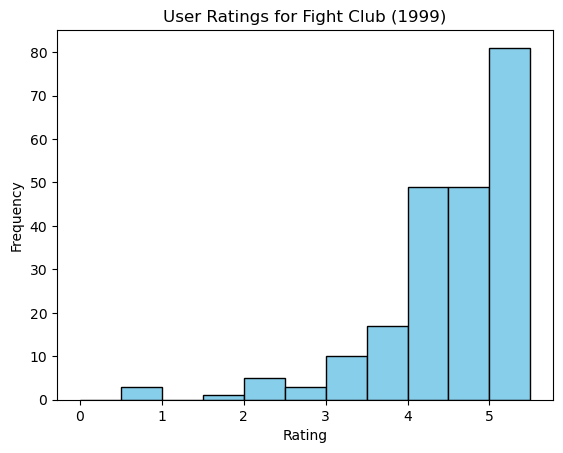

In [8]:
fight_club_movie_id = movies.loc[movies['title'] == "Fight Club (1999)", 'movieId'].values[0]
fight_club_ratings = ratings.loc[ratings['movieId'] == fight_club_movie_id, 'rating']
plt.hist(fight_club_ratings, bins=np.arange(0, 6, 0.5), color='skyblue', edgecolor='black')
plt.title("User Ratings for Fight Club (1999)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [9]:
grouped_ratings = ratings.groupby('movieId').agg(count_ratings=('rating', 'count'), mean_rating=('rating', 'mean')).reset_index()
merged_data = pd.merge(movies, grouped_ratings, on='movieId')
filtered_data = merged_data[merged_data['count_ratings'] > 50]

In [10]:
top_movies_by_ratings = filtered_data.sort_values(by='count_ratings', ascending=False).head(5)['title']
print(top_movies_by_ratings)

314                  Forrest Gump (1994)
277     Shawshank Redemption, The (1994)
257                  Pulp Fiction (1994)
510     Silence of the Lambs, The (1991)
1938                  Matrix, The (1999)
Name: title, dtype: object


In [11]:
most_popular_movie = filtered_data[filtered_data['mean_rating'] == filtered_data['mean_rating'].max()]['title'].values[0]
print(most_popular_movie)

Shawshank Redemption, The (1994)


In [12]:
sci_fi_movies = filtered_data[filtered_data['genres'].str.contains("Sci-Fi", case=False, na=False)]
ordered_sci_fi_movies = sci_fi_movies.sort_values(by='count_ratings', ascending=False)
third_most_popular_sci_fi_movie = ordered_sci_fi_movies.iloc[2]['title']
print(third_most_popular_sci_fi_movie)

Jurassic Park (1993)


In [14]:
import requests
import numpy as np
import bs4

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = bs4.BeautifulSoup(response.text,"html.parser")
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

In [22]:
scrapper(5476944)

'7.6'

In [24]:
movie_links=filtered_data.merge(right=links_df,how='inner',on='movieId')
movie_links

,movieId,title,genres,count_ratings,mean_rating,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [25]:
movie_links['imdb_ratings']=movie_links['imdbId'].apply(lambda x:scrapper(str(x)))
movie_links

,movieId,title,genres,count_ratings,mean_rating,imdbId,tmdbId,imdb_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.6
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,8.2
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,8.1
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0


In [26]:
movie_links.sort_values(by='imdb_ratings',ascending=False).head()

,movieId,title,genres,count_ratings,mean_rating,imdbId,tmdbId,imdb_ratings
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0,9.3
117,858,"Godfather, The (1972)",Crime|Drama,192,4.289062,68646,238.0,9.2
146,1203,12 Angry Men (1957),Drama,57,4.149123,50083,389.0,9.0
364,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185,4.118919,167260,122.0,9.0
156,1221,"Godfather: Part II, The (1974)",Crime|Drama,129,4.259690,71562,240.0,9.0


In [27]:
scifi_movies=movie_links[movie_links['genres'].str.contains('Sci-Fi')]
scifi_movies.head(1)

,movieId,title,genres,count_ratings,mean_rating,imdbId,tmdbId,imdb_ratings
12,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051,114746,63.0,8.0


In [28]:
scifi_movies.sort_values(by='imdb_ratings',ascending=False).head(1)

,movieId,title,genres,count_ratings,mean_rating,imdbId,tmdbId,imdb_ratings
424,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434,1375666,27205.0,8.8
